# GPyOpt: batch thompson sampling

### Written by Takuma Yamashita, University of Tokyo.

*Last updated Monday, 12 March 2018.*

In this noteboook we are going to learn how to use GPyOpt to run parallel BO methods. The goal of these approaches is to make use of all the computational power or our machine to perform the optimization. For instance, if we hace a computer with 4 cores, we may want to make 4 evaluations of $f$ in parallel everytime we test the performance of the algorithm. 

In this notebook we will use the **synchronous thompson sampling** method adn **asynchronous thompson sampling** method.

In [23]:
from IPython.display import HTML 
HTML('<iframe src=https://arxiv.org/pdf/1705.09236.pdf width=700 height=550></iframe>')

In [24]:
%pylab inline  
import GPyOpt

Populating the interactive namespace from numpy and matplotlib


As in previous examples we use a synthetic objective function but you can think about doing the same with any function you like. In this case, we use the Branin function. For the optimization we will perturb the evaluations with Gaussian noise with sd = 0.1.

In [25]:
# --- Objective function
objective_true  = GPyOpt.objective_examples.experiments2d.branin()                 # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(sd = 0.1, wait = 10)         # noisy version
bounds = objective_noisy.bounds        

In [26]:
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}, ## use default bounds
          {'name': 'var_2', 'type': 'continuous', 'domain': bounds[1]}]

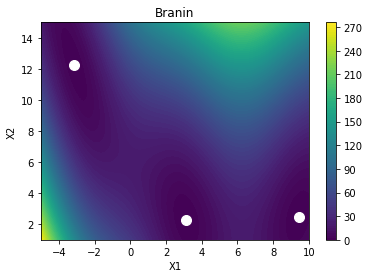

In [27]:
objective_true.plot()

As in previous cases, we create a GPyOpt object with the desing space and fucntion to optimize. In this case we need to select the evaluator type, which in this case is the *synchronous_TS* the batch size and the number of cores that we want to use. The evaluation of the function will be splitted accross the available cores.

In [28]:
batch_size = 4
num_cores = 4

In [29]:
from numpy.random import seed
seed(123)
BO_demo_parallel = GPyOpt.methods.BayesianOptimization(f=objective_noisy.f,  
                                            domain = domain,                  
                                            acquisition_type = 'Thompson_Sampling',              
                                            normalize_Y = True,
                                            initial_design_numdata = 10,
                                            evaluator_type = 'synchronous_TS',
                                            #evaluator_type = 'asynchronous_TS',
                                            batch_size = batch_size,
                                            num_cores = num_cores,
                                            acquisition_jitter = 0)    

In [30]:
import time
# --- Run the optimization for 10 iterations
max_iter = 10
start = time.time()
BO_demo_parallel.run_optimization(max_iter)
end = time.time()
print("execution time",end-start)

execution time 85.44459676742554


We plot the resutls. Observe that the final number of evaluations that we will make is $10*4=40$. 

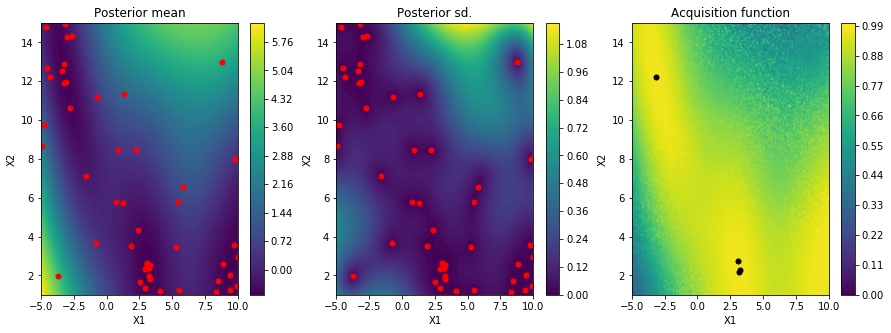

In [31]:
BO_demo_parallel.plot_acquisition()

See how the method explores the space using the four parallel evaluations of $f$ and it is able to identify the location of the three minima. 

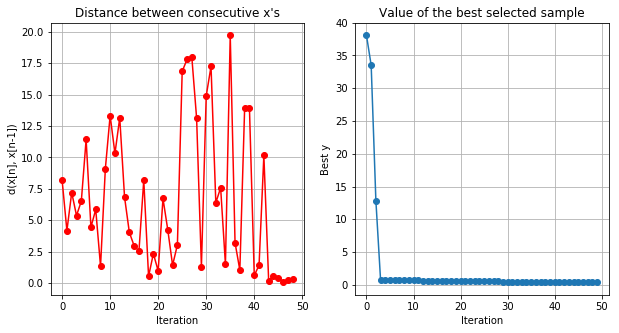

In [32]:
BO_demo_parallel.plot_convergence()